In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.


In [1]:
pip install --upgrade numpy

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.


In [1]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

C:\Users\Juan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


tf.Tensor(1621.6578, shape=(), dtype=float32)


In [2]:
# Librerías necesarias
from random import seed  # Para inicializar el generador de números aleatorios
from random import randrange  # Para generar números aleatorios dentro de un rango
from csv import reader  # Para leer y analizar archivos CSV


#from google.colab import drive
import pandas as pd
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation


import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
import os
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import ipywidgets as widgets
from IPython.display import display
from datetime import timedelta
from scipy.spatial.distance import euclidean
import sys
from matplotlib.lines import Line2D
import pickle
from scipy.spatial.distance import cdist


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import math
#from ctgan import CTGAN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import joblib


from sklearn.model_selection import StratifiedKFold

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import time
import gc

from sklearn.metrics import confusion_matrix

import pickle

from sklearn.metrics import accuracy_score

In [3]:
import os
print("Número de núcleos de CPU disponibles:", os.cpu_count())

Número de núcleos de CPU disponibles: 16


In [4]:
def reproducibilidad():
    # Numpy
    np.random.seed(3)

    # Python Random
    random.seed(3)

    # Tensorflow
    tf.random.set_seed(3)


def experimentosMLP(df_red_neuronal, nombre_archivo):
    reproducibilidad()

    modelos = {}

    skf = StratifiedKFold(n_splits=10, shuffle=True)

    X = df_red_neuronal.drop(labels='IMECA_Total', axis=1).values
    Y = df_red_neuronal['IMECA_Total'].values

    tiempo_inicio = time.time()  # Tiempo de inicio

    acc_promedio = 0.0  # Variable para acumular la precisión de cada modelo
    i=1
    for train_index, test_index in skf.split(X, Y):
        dim_entrada = X.shape[1]
        dim_salida = 4  # Número de clases
        na = ((2/3) * dim_entrada) + (dim_salida)
        na = math.trunc(na)

        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        modelo = Sequential()
        modelo.add(Dense(na, input_dim=dim_entrada, activation='tanh'))
        modelo.add(Dense(na/2, activation='tanh'))
        modelo.add(Dense(dim_salida, activation='softmax'))

        modelo.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=[categorical_accuracy])

        # Ajustar los índices de las clases para estar en el rango de 0 a 3
        Y_train_onehot = to_categorical(Y_train - 1, num_classes=dim_salida)
        Y_test_onehot = to_categorical(Y_test - 1, num_classes=dim_salida)

        history = modelo.fit(X_train, Y_train_onehot, validation_data=(X_test, Y_test_onehot), batch_size=50, epochs=15, 
                             shuffle=True, verbose=1, workers=8, callbacks=[EarlyStopping(monitor='categorical_accuracy', patience=3)])
                                #Originalmente shuffle es False
        modelos['modelo_prueba_kfold_' + str(len(modelos) + 1)] = modelo

        _, acc = modelo.evaluate(X_test, Y_test_onehot)  # Obtenemos la precisión del modelo
        acc_promedio += acc  # Acumulamos la precisión


        print('####\tResultado del Modelo K-Fold\t####', i)

        print(modelo.evaluate(X_test, Y_test_onehot))
        i=i+1
    tiempo_fin = time.time()  # Tiempo de finalización
    tiempo_total = tiempo_fin - tiempo_inicio  # Tiempo total

    acc_promedio /= 10  # Calculamos el promedio de la precisión

    print("Tiempo total:", tiempo_total)
    print("Promedio de categorical_accuracy:", acc_promedio)

    ruta_modelos ='Modelo_neuronal_'+ nombre_archivo + '.pkl'
    with open(ruta_modelos, 'wb') as archivo:
        pickle.dump(modelos, archivo)


    # Liberar la memoria de los objetos que ya no se necesitan
    del modelos
    del skf
    del X
    del Y

    gc.collect()

    return tiempo_total, acc_promedio



import pickle

def cargar_modelos(ruta_modelos):
    with open(ruta_modelos, 'rb') as archivo:
        modelos = pickle.load(archivo)
    return modelos






def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    # Calcular la métrica de evaluación (por ejemplo, precisión)
    precision = accuracy_score(y_test, y_pred_labels)
    return precision


#modificar la ruta para guardar los modelos de las redes neuronales

# DataFrame Normal

In [5]:
TIMES1 = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES1)

# Convierte la columna de fecha en formato datetime, si no lo está ya
df_normalizado1['TIMESTAMP'] = pd.to_datetime(df_normalizado1['TIMESTAMP'])

df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)

# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

# Obtén el número de columnas del DataFrame
num_columnas1 = df_red_neuronal1.shape[1]

# Imprime el número de columnas
print("Número de columnas:", num_columnas1)

Número de columnas: 24


In [ ]:
Tiempo, accuracy= experimentosMLP(df_red_neuronal1, nombre_archivo='Normal_Completo')
print(Tiempo, accuracy)

In [ ]:
# Crear un DataFrame con los valores de tiempo_total y acc_promedio
df_rendimiento_Smote = pd.DataFrame({'Num_Características': 23,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[23])
    #'Num_Características': num_características,'Tiempo_Total': tiempo_total_lista, 'Accuracy_Promedio': acc_promedio_lista})

# Guardar el DataFrame en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Normal_Completo.csv'
df_rendimiento_Smote.to_csv(guardar_rendimiento, index=True)

In [ ]:
ruta_modelos = 'Modelo_neuronal_Normal_Completo.pkl'
modelos_cargados = cargar_modelos(ruta_modelos)

# Datos de prueba
X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Evaluar cada modelo y obtener su rendimiento
rendimientos = {}
i = 1
for nombre_modelo, modelo in modelos_cargados.items():

    rendimiento = evaluar_modelo(modelo, X_test, y_test)
    rendimientos[nombre_modelo] = rendimiento
    print('acabé ', i, ' veces.')
    print('Rendimiento del modelo', nombre_modelo, 'es:', rendimiento)
    i += 1
    print(' ')

# Seleccionar el modelo con el mejor rendimiento
print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
mejor_modelo = max(rendimientos, key=rendimientos.get)
print("El mejor modelo es:", mejor_modelo)
print("Con una precisión de:", rendimientos[mejor_modelo])


62298/62298 [==============================] - 30s 477us/step
Matriz de Confusión:
[[ 69798   8122   7530   1454]
 [283536 995852 458110  65421]
 [  5987  20660  59010   8209]
 [   191     75    211   9366]]


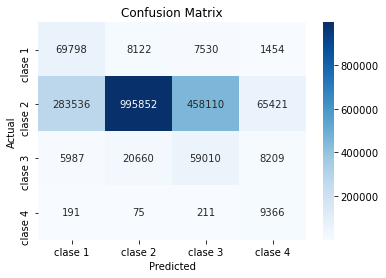

In [6]:
X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']


# Cargar el modelo específico del archivo pkl
ruta_modelo = 'Modelo_neuronal_Normal_Completo.pkl'
with open(ruta_modelo, 'rb') as f:
    modelos_cargados = pickle.load(f)

# Extraer el modelo específico
modelo_prueba_kfold_7 = modelos_cargados['modelo_prueba_kfold_7']

# Obtener las predicciones del modelo en todo el conjunto de datos
y_pred = modelo_prueba_kfold_7.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels = [x + 1 for x in y_pred_labels]

# Definir etiquetas de las clases
labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")

plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

print("Matriz de Confusión:")
print(conf_matrix)

In [ ]:
Times_prueba='C:\\Users\\Juan\\Documentos\\datos.csv'
# Guardar el DataFrame en un archivo CSV
guardar_rendimiento = '/content/drive/My Drive/Maestria-programas/Seleccion/Accuracy_TiempoEjecucion/Varianza_MayorIgual_1.csv'

# Data Frame con Smote

In [ ]:
TIMES2 = 'SMOTE_DATA.csv'
#'sonar.all-data.csv'
#'/content/drive/My Drive/Maestria-programas/Muestras_Unidas/SMOTE_CTGAN/SMOTE_DATA.csv'

df_red_neuronal2 = pd.read_csv(TIMES2)

# Obtén el número de columnas del DataFrame
num_columnas2 = df_red_neuronal2.shape[1]

# Imprime el número de columnas
print("Número de columnas:", num_columnas2)

In [ ]:
df_red_neuronal2.describe().T

In [ ]:
df_red_neuronal2.info()

In [ ]:
Tiempo, accuracy= experimentosMLP(df_red_neuronal2, nombre_archivo='Smote_Completo')

# Crear un DataFrame con los valores de tiempo_total y acc_promedio
Smote_rendimiento_completo_Smote = pd.DataFrame({'Num_Características': 23,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[23])

# Guardar el DataFrame en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Smote_completo.csv'
Smote_rendimiento_completo_Smote.to_csv(guardar_rendimiento, index=True)

In [ ]:
ruta_modelos = 'Modelo_neuronal_Smote_Completo.pkl'
modelos_cargados = cargar_modelos(ruta_modelos)

# Datos de prueba
X_test = df_red_neuronal2.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal2['IMECA_Total']

# Evaluar cada modelo y obtener su rendimiento
rendimientos = {}
i = 1
for nombre_modelo, modelo in modelos_cargados.items():

    rendimiento = evaluar_modelo(modelo, X_test, y_test)
    rendimientos[nombre_modelo] = rendimiento
    print('acabé ', i, ' veces.')
    print('Rendimiento del modelo', nombre_modelo, 'es:', rendimiento)
    i += 1
    print(' ')

print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
print(' ')
# Seleccionar el modelo con el mejor rendimiento
mejor_modelo = max(rendimientos, key=rendimientos.get)
print("El mejor modelo es:", mejor_modelo)
print("Con una precisión de:", rendimientos[mejor_modelo])


In [ ]:
X_test = df_red_neuronal2.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal2['IMECA_Total']


# Cargar el modelo específico del archivo pkl
ruta_modelo = 'Modelo_neuronal_Smote_Completo.pkl'
with open(ruta_modelo, 'rb') as f:
    modelos_cargados = pickle.load(f)

# Extraer el modelo específico
modelo_prueba_kfold_9 = modelos_cargados['modelo_prueba_kfold_9']

# Obtener las predicciones del modelo en todo el conjunto de datos
y_pred = modelo_prueba_kfold_9.predict(X_test)

# Convertir las predicciones a etiquetas
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels = [x + 1 for x in y_pred_labels]

# Definir etiquetas de las clases
labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")

plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

print("Matriz de Confusión:")
print(conf_matrix)